In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

> Import libraries that we need for our code

In [37]:
# baseline model with dropout on the cifar10 dataset
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Loading Dataset "Cifar10"

In [38]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [39]:
X_test.shape

(10000, 32, 32, 3)

In [40]:
y_train.shape

(50000, 1)

In [41]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

Reshpe y_train from 2d to 1d

In [42]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

Reshpe y_test from 2d to 1d

In [43]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [44]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Define funcation named "plot_sample" to show image form Dataset

In [45]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

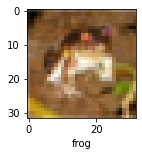

In [46]:
plot_sample(X_train, y_train, 0)

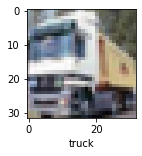

In [48]:
plot_sample(X_train, y_train, 1)

Normalizing X_train & X_test in range 0 to 1

In [49]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Build CNN Model with 2 layers Convoulation & Flatten layer & Fully Connected layer with activiation funcation "Relu"

In [50]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

Model Compile

In [52]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model Fitting

In [54]:
cnn.fit(X_train, y_train, epochs=100)

Epoch 1/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5861 - accuracy: 0.7929
Epoch 2/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5487 - accuracy: 0.8082
Epoch 3/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5164 - accuracy: 0.8163
Epoch 4/100
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4851 - accuracy: 0.8272
Epoch 5/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4586 - accuracy: 0.8363
Epoch 6/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4279 - accuracy: 0.8492
Epoch 7/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4020 - accuracy: 0.8574
Epoch 8/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3828 - accuracy: 0.8635
Epoch 9/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3563 - accuracy: 0.8746
Epoch 10/100
1563/1563 [==============================] - 5s 3ms/step - l

Evalute Model

In [55]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 5.1903 - accuracy: 0.6498


[5.190342903137207, 0.6498000025749207]

In [56]:
from sklearn.metrics import  classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.75      0.67      1000
           1       0.85      0.70      0.77      1000
           2       0.52      0.61      0.56      1000
           3       0.47      0.40      0.43      1000
           4       0.56      0.62      0.59      1000
           5       0.57      0.55      0.56      1000
           6       0.73      0.70      0.71      1000
           7       0.76      0.67      0.71      1000
           8       0.74      0.79      0.76      1000
           9       0.74      0.73      0.74      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000



In [57]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[5.09293460e-23, 4.75911386e-19, 1.01173200e-13, 1.94524661e-01,
        2.59682253e-17, 8.05475295e-01, 9.95459507e-18, 6.35460585e-29,
        4.03172041e-22, 5.00707991e-29],
       [4.43326087e-08, 3.16288649e-08, 2.54915703e-33, 0.00000000e+00,
        4.60730109e-28, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        9.99999881e-01, 2.55682401e-16],
       [1.96504716e-05, 1.22743906e-04, 2.94328695e-09, 1.79811851e-12,
        3.71162446e-06, 1.49061345e-15, 4.56364617e-31, 3.26733473e-14,
        9.99853849e-01, 2.24703624e-13],
       [1.00000000e+00, 8.81301282e-19, 1.27005475e-14, 3.40655035e-23,
        1.27540504e-14, 6.34411661e-35, 1.72280221e-24, 2.86052831e-15,
        1.12309994e-15, 1.69808966e-28],
       [3.66652688e-24, 1.43307826e-19, 4.16026883e-17, 2.15624630e-01,
        7.36107171e-01, 8.49247854e-15, 4.82682511e-02, 2.26720997e-26,
        1.13976528e-16, 1.23073268e-36]], dtype=float32)

In [60]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[5, 8, 8, 0, 4, 6, 1, 6, 3, 9]

In [61]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

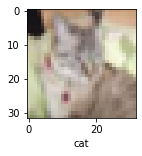

In [62]:
plot_sample(X_test, y_test,8)

In [64]:
classes[y_classes[8]]

'cat'